In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\andy\anaconda3\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df


,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [5]:
list(df.columns) 

['koi_disposition',
 'koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_fpflag_co',
 'koi_fpflag_ec',
 'koi_period',
 'koi_period_err1',
 'koi_period_err2',
 'koi_time0bk',
 'koi_time0bk_err1',
 'koi_time0bk_err2',
 'koi_impact',
 'koi_impact_err1',
 'koi_impact_err2',
 'koi_duration',
 'koi_duration_err1',
 'koi_duration_err2',
 'koi_depth',
 'koi_depth_err1',
 'koi_depth_err2',
 'koi_prad',
 'koi_prad_err1',
 'koi_prad_err2',
 'koi_teq',
 'koi_insol',
 'koi_insol_err1',
 'koi_insol_err2',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_steff',
 'koi_steff_err1',
 'koi_steff_err2',
 'koi_slogg',
 'koi_slogg_err1',
 'koi_slogg_err2',
 'koi_srad',
 'koi_srad_err1',
 'koi_srad_err2',
 'ra',
 'dec',
 'koi_kepmag']

# Select your features (columns)

In [6]:
# Set features. This will also be used as your x values.
X = df[['koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co','koi_fpflag_ec','koi_period','koi_period_err1','koi_period_err2','koi_time0bk','koi_time0bk_err1','koi_time0bk_err2',
        'koi_impact','koi_impact_err1','koi_impact_err2','koi_duration','koi_duration_err1','koi_duration_err2','koi_depth','koi_depth_err1','koi_depth_err2','koi_prad',
        'koi_prad_err1','koi_prad_err2','koi_teq','koi_insol','koi_insol_err1','koi_insol_err2','koi_model_snr','koi_tce_plnt_num','koi_steff','koi_steff_err1','koi_steff_err2',
        'koi_slogg','koi_slogg_err1','koi_slogg_err2','koi_srad','koi_srad_err1','koi_srad_err2','ra','dec','koi_kepmag']]
y= df["koi_disposition"]

In [7]:
print(X.shape, y.shape)

(6991, 40) (6991,)


# Create a Train Test Split

Use `koi_disposition` for the y values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
3563,0,0,0,0,10.548413,5.470000e-05,-5.470000e-05,139.064020,0.004110,-0.004110,...,-133,4.387,0.066,-0.123,1.092,0.181,-0.097,298.09543,44.737061,13.204
4099,0,0,0,0,24.754385,1.365000e-04,-1.365000e-04,140.207320,0.004460,-0.004460,...,-144,4.519,0.078,-0.052,0.804,0.056,-0.076,295.73535,42.576248,15.514
5460,0,0,0,0,1.057336,1.230000e-07,-1.230000e-07,131.792007,0.000096,-0.000096,...,-140,4.594,0.054,-0.027,0.683,0.054,-0.060,292.18417,49.310040,15.414
1091,0,0,0,0,201.118319,1.461000e-03,-1.461000e-03,187.569860,0.005290,-0.005290,...,-112,4.447,0.072,-0.108,0.954,0.135,-0.083,283.11377,48.131390,13.328
5999,0,0,0,0,91.649983,3.181000e-03,-3.181000e-03,175.715600,0.028600,-0.028600,...,-233,4.145,0.164,-0.164,1.608,0.905,-0.383,294.93198,39.812420,12.964


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [12]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, Normalizer
X_scaler = MinMaxScaler().fit(X_train)
X_normalizer = Normalizer().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
#X_train_normalized = X_normalizer.transform(X_train_scaled)
#X_test_normalized = X_normalizer.transform(X_test_scaled)


label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)


# Train the Model (Support Vector Machine)

k: 1, Train/Test Score: 1.000/0.787
k: 3, Train/Test Score: 0.895/0.805
k: 5, Train/Test Score: 0.871/0.811
k: 7, Train/Test Score: 0.862/0.818
k: 9, Train/Test Score: 0.858/0.820
k: 11, Train/Test Score: 0.848/0.830
k: 13, Train/Test Score: 0.848/0.830
k: 15, Train/Test Score: 0.842/0.830
k: 17, Train/Test Score: 0.839/0.830
k: 19, Train/Test Score: 0.836/0.831
k: 21, Train/Test Score: 0.835/0.832
k: 23, Train/Test Score: 0.834/0.831
k: 25, Train/Test Score: 0.829/0.827
k: 27, Train/Test Score: 0.829/0.830
k: 29, Train/Test Score: 0.829/0.831
k: 31, Train/Test Score: 0.828/0.826
k: 33, Train/Test Score: 0.828/0.831
k: 35, Train/Test Score: 0.827/0.832
k: 37, Train/Test Score: 0.826/0.832
k: 39, Train/Test Score: 0.824/0.830
k: 41, Train/Test Score: 0.824/0.834
k: 43, Train/Test Score: 0.823/0.835
k: 45, Train/Test Score: 0.823/0.835
k: 47, Train/Test Score: 0.825/0.836
k: 49, Train/Test Score: 0.824/0.835
k: 51, Train/Test Score: 0.824/0.836
k: 53, Train/Test Score: 0.823/0.836
k: 55,

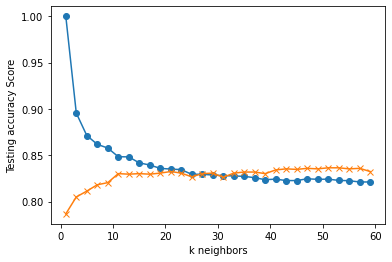

In [30]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 60, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 60, 2), train_scores, marker='o')
plt.plot(range(1, 60, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [33]:
test_scores

[0.7866132723112128,
 0.8049199084668193,
 0.8112128146453089,
 0.8180778032036613,
 0.8203661327231121,
 0.830091533180778,
 0.8295194508009154,
 0.830091533180778,
 0.8295194508009154,
 0.8306636155606407,
 0.8323798627002288,
 0.8306636155606407,
 0.8266590389016019,
 0.830091533180778,
 0.8306636155606407,
 0.8260869565217391,
 0.8306636155606407,
 0.8318077803203662,
 0.8318077803203662,
 0.830091533180778,
 0.834096109839817,
 0.8352402745995423,
 0.8346681922196796,
 0.835812356979405,
 0.8352402745995423,
 0.8363844393592678,
 0.8363844393592678,
 0.8352402745995423,
 0.835812356979405,
 0.8323798627002288]

In [31]:
print('Test Acc: %.3f' % max(test_scores))

Test Acc: 0.836


In [34]:
test_scores.index(0.8363844393592678)

25

In [35]:
print(f"Training Data Score: {train_scores[25]}")
print(f"Testing Data Score: {max(test_scores)}")

Training Data Score: 0.8241464810223155
Testing Data Score: 0.8363844393592678


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [38]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
k_range= list(range(1,60,2))
param_grid = dict(n_neighbors=k_range)

In [40]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

grid.fit(X_train_scaled, encoded_y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=59),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49, 51, 53, 55, 57, 59]},
             scoring='accuracy')

In [111]:
# Train the model with GridSearch

In [41]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 25}
0.8159411123227918


# Save the Model

In [42]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'IYK_KNN.sav'
joblib.dump(knn, filename)

['IYK_KNN.sav']